In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline # plot in cell
from sklearn import metrics
import pandas as pd
from scipy import signal
from scipy import stats
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# for svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from scipy.stats import entropy
from numpy import cov
from scipy.signal import find_peaks
import seaborn as sns
import warnings
import math

Mounted at /content/drive


instal thư viện xuất code C

In [4]:
G = 9.80665
columns1 = ['Activity','timestamp','ss1','ss2','Gyr_X', 'Gyr_Y','Gyr_Z','frequency']
columns = ['Activity','timestamp','ss1','Acc_X', 'Acc_Y', 'Acc_Z','ss2','Gyr_X', 'Gyr_Y','Gyr_Z','frequency']
Activity_list = ['Walking','Jogging','Squatting','Bending','Bendp','Limp','TripOver','Sit-down','Lie down','Rising','Standing','Sitting','Lying']
Activity_text = ['Walking','Jogging','Squatting','Bending','Bending-pick-up','Limp','TripOver','Sitting-down','Lying-bed','Rising-bed','Standing','Sitting','Lying']
address='/content/drive/MyDrive/NCS Hieu/cong viec thang 4.2022/private data/'

Walking = pd.read_csv(address+Activity_text[0]+'.TXT', header = None, names = columns)
Walking= Walking.drop(columns = columns1)
Walking = Walking.dropna()
Walking = Walking.div(G)

Jogging = pd.read_csv(address+Activity_text[1]+'.TXT', header = None, names = columns)
Jogging = Jogging.drop(columns = columns1)
Jogging = Jogging.dropna()
Jogging = Jogging.div(G)

Squatting = pd.read_csv(address+Activity_text[2]+'.TXT', header = None, names = columns)
Squatting = Squatting.drop(columns = columns1)
Squatting = Squatting.dropna()
Squatting = Squatting.div(G)

Bending = pd.read_csv(address+Activity_text[3]+'.TXT', header = None, names = columns)
Bending=Bending.drop(columns = columns1)
Bending= Bending.dropna()
Bending = Bending.div(G)

Bendingp = pd.read_csv(address+Activity_text[4]+'.TXT', header = None, names = columns)
Bendingp=Bendingp.drop(columns = columns1)
Bendingp= Bendingp.dropna()
Bendingp = Bendingp.div(G)

Limp = pd.read_csv(address+Activity_text[5]+'.TXT', header = None, names = columns)
Limp = Limp.drop(columns = columns1)
Limp = Limp.dropna()
Limp = Limp.div(G)

TripOver = pd.read_csv(address+Activity_text[6]+'.TXT', header = None, names = columns)
TripOver = TripOver.drop(columns = columns1)
TripOver = TripOver.dropna()
TripOver = TripOver.div(G)

Sitdown = pd.read_csv(address+Activity_text[7]+'.TXT', header = None, names = columns)
Sitdown = Sitdown.drop(columns = columns1)
Sitdown = Sitdown.dropna()
Sitdown = Sitdown.div(G)

Lyingdown = pd.read_csv(address+Activity_text[8]+'.TXT', header = None, names = columns)
Lyingdown = Lyingdown.drop(columns = columns1)
Lyingdown = Lyingdown.dropna()
Lyingdown = Lyingdown.div(G)

Rising = pd.read_csv(address+Activity_text[9]+'.TXT', header = None, names = columns)
Rising = Rising.drop(columns = columns1)
Rising = Rising.dropna()
Rising = Rising.div(G)

Standing = pd.read_csv(address+Activity_text[10]+'.TXT', header = None, names = columns)
Standing=Standing.drop(columns = columns1)
Standing = Standing.dropna()
Standing = Standing.div(G)

Sitting = pd.read_csv(address+Activity_text[11]+'.TXT', header = None, names = columns)
Sitting = Sitting.drop(columns = columns1)
Sitting = Sitting.dropna()
Sitting = Sitting.div(G)

Lying = pd.read_csv(address+Activity_text[12]+'.TXT', header = None, names = columns)
Lying = Lying.drop(columns = columns1)
Lying = Lying.dropna()
Lying = Lying.div(G)

<Figure size 864x288 with 0 Axes>

Text(0.5, 1.0, 'limp raw')

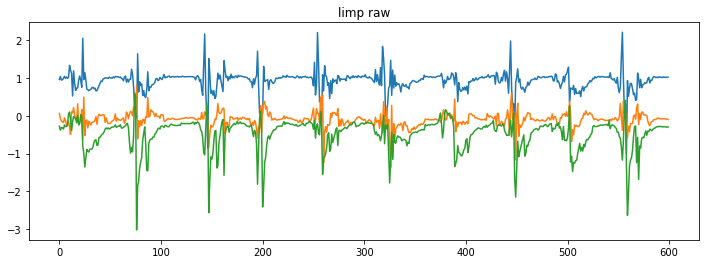

In [5]:
plt.figure(figsize = (12, 4))
plt.title("limp raw")
index_start = 0
index_stop = 600
plt.plot(TripOver['Acc_X'][index_start:index_stop])
plt.plot(TripOver['Acc_Y'][index_start:index_stop])
plt.plot(TripOver['Acc_Z'][index_start:index_stop])
plt.show()

In [6]:
total = len(Walking)+len(Jogging) +len(Squatting) + len(Bending)+len(Bendingp) +len(Limp) + len(TripOver) +len(Sitdown) +len(Lyingdown)+len(Rising) +len(Standing) +len(Sitting)+len(Lying)
print('total = ', total)
print('Walkingfw: {:.2f}'.format(len(Walking)/total * 100),'-- ',len(Walking))
print('Jogging: {:.2f}'.format(len(Jogging)/total * 100),'-- ',len(Jogging))
print('Squatting: {:.2f}'.format(len(Squatting)/total * 100),'-- ',len(Squatting))
print('Bending: {:.2f}'.format(len(Bending)/total * 100),'-- ',len(Bending))
print('Bending pickup: {:.2f}'.format(len(Bendingp)/total * 100),'-- ',len(Bendingp))
print('Limp: {:.2f}'.format(len(Limp)/total * 100),'-- ',len(Limp))
print('TripOver: {:.2f}'.format(len(TripOver)/total * 100),'-- ',len(TripOver))
print('Sitdown: {:.2f}'.format(len(Sitdown)/total * 100),'-- ',len(Sitdown))
print('Lyingdown: {:.2f}'.format(len(Lyingdown)/total * 100),'-- ',len(Lyingdown))
print('Rising: {:.2f}'.format(len(Rising)/total * 100),'-- ',len(Rising))
print('Standing: {:.2f}'.format(len(Standing)/total * 100),'-- ',len(Standing))
print('Sitting: {:.2f}'.format(len(Sitting)/total * 100),'-- ',len(Sitting))
print('lying: {:.2f}'.format(len(Lying)/total * 100),'-- ',len(Lying))

total =  82367
Walkingfw: 9.66 --  7959
Jogging: 5.57 --  4589
Squatting: 7.36 --  6060
Bending: 4.24 --  3496
Bending pickup: 7.72 --  6360
Limp: 8.85 --  7288
TripOver: 10.05 --  8280
Sitdown: 9.40 --  7740
Lyingdown: 5.39 --  4440
Rising: 6.48 --  5340
Standing: 8.25 --  6797
Sitting: 8.60 --  7084
lying: 8.42 --  6934


In [7]:
def train_test_Data(data):
  window_size = 3*20
  stride = 3*20
  RateTrain = 0.75
  X_data_train = []
  X_data_test = []
  X_data = [data[i:i+window_size] for i in range(0, int(len(data)), stride) if i+window_size<=int(len(data))]
  if RateTrain < 1:
    X_data_test, X_data_train = train_test_split(X_data, test_size=RateTrain)
  else:
    X_data_train = X_data
  return X_data_train, X_data_test
X_Walking_train,X_Walking_test = train_test_Data(Walking)
X_Jogging_train,X_Jogging_test = train_test_Data(Jogging)
X_Squatting_train,X_Squatting_test = train_test_Data(Squatting)
X_Bending_train,X_Bending_test = train_test_Data(Bending)
X_Bendingp_train,X_Bendingp_test = train_test_Data(Bendingp)
X_Limp_train,X_Limp_test = train_test_Data(Limp)
X_TripOver_train,X_TripOver_test = train_test_Data(TripOver)
X_Sitdown_train,X_Sitdown_test = train_test_Data(Sitdown)
X_Lyingdown_train,X_Lyingdown_test = train_test_Data(Lyingdown)
X_Rising_train,X_Rising_test = train_test_Data(Rising)
X_Standing_train,X_Standing_test = train_test_Data(Standing)
X_Sitting_train,X_Sitting_test = train_test_Data(Sitting)
X_Lying_train,X_Lying_test = train_test_Data(Lying)
print('Walking: ', len(X_Walking_train)+len(X_Walking_test))
print('Jogging: ', len(X_Jogging_train)+len(X_Jogging_test))
print('Squatting: ', len(X_Squatting_train)+len(X_Squatting_test))
print('Bending: ', len(X_Bending_train)+len(X_Bending_test))
print('Bending pick up: ', len(X_Bendingp_train)+len(X_Bendingp_test))
print('Limp: ', len(X_Limp_train)+len(X_Limp_test))
print('TripOver: ', len(X_TripOver_train)+len(X_TripOver_test))
print('Sitdown: ', len(X_Sitdown_train)+len(X_Sitdown_test))
print('Lyingdown: ', len(X_Lyingdown_train)+len(X_Lyingdown_test))
print('Rising: ', len(X_Rising_train)+len(X_Rising_test))
print('Standing: ', len(X_Standing_train)+len(X_Standing_test))
print('Sitting: ', len(X_Sitting_train)+len(X_Sitting_test))
print('Lying: ', len(X_Lying_train)+len(X_Lying_test))

# #tao chuoi du lieu va nhan dung de train
data_window_train= []
label_window_train = []
for acts in X_Walking_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(0)

for acts in X_Jogging_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(1)

for acts in X_Squatting_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(2)

for acts in X_Bending_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(3)

for acts in X_Bendingp_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(4)

for acts in X_Limp_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(5)

for acts in X_TripOver_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(6)

for acts in X_Sitdown_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(7)

for acts in X_Lyingdown_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(8)

for acts in X_Rising_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(9)

for acts in X_Standing_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(10)

for acts in X_Sitting_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(11)

for acts in X_Lying_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(12)


print('data\'s length: ', len(data_window_train))
print('label\'s length: ', len(label_window_train))

data_window_test= []
label_window_test = []
for acts in X_Walking_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(0)

for acts in X_Jogging_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(1)

for acts in X_Squatting_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(2)

for acts in X_Bending_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(3)

for acts in X_Bendingp_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(4)

for acts in X_Limp_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(5)

for acts in X_TripOver_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(6)

for acts in X_Sitdown_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(7)

for acts in X_Lyingdown_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(8)

for acts in X_Rising_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(9)

for acts in X_Standing_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(10)

for acts in X_Sitting_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(11)

for acts in X_Lying_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(12)


print('data\'s length: ', len(data_window_test))
print('label\'s length: ', len(label_window_test))

Walking:  132
Jogging:  76
Squatting:  101
Bending:  58
Bending pick up:  106
Limp:  121
TripOver:  138
Sitdown:  129
Lyingdown:  74
Rising:  89
Standing:  113
Sitting:  118
Lying:  115
data's length:  1032
label's length:  1032
data's length:  338
label's length:  338


In [8]:
def correlation(x, y):
  # Finding the mean of the series x and y
  mean_x = sum(x)/float(len(x))
  mean_y = sum(y)/float(len(y))
  # Subtracting mean from the individual elements
  sub_x = [i-mean_x for i in x]
  sub_y = [i-mean_y for i in y]
  # covariance for x and y
  numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])/(float(len(x))-1)
  # Standard Deviation of x and y
  std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])/float(len(x))
  std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])/float(len(y))
  # squaring by 0.5 to find the square root
  denominator = (std_deviation_x*std_deviation_y)**0.5 # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
  cor = numerator/denominator
  return cor
def cosin_acc(v1, v2):
  arr_v1 = np.array(v1)
  arr_v2 = np.array(v2)
  anpha = (arr_v1[0]*arr_v2[0] + arr_v1[1]*arr_v2[1] +arr_v1[2]*arr_v2[2])/(math.sqrt(arr_v1[0]**2 +arr_v1[1]**2 + arr_v1[2]**2) * math.sqrt(arr_v2[0]**2 +arr_v2[1]**2 + arr_v2[2]**2))
  return anpha
feature_names = ['mean_ax', 'mean_ay', 'mean_az',
                'rms_ax', 'rms_ay', 'rms_az',
                'std_ax', 'std_ay', 'std_az',
                'med_ax', 'med_ay', 'med_az',
                'min_ax','min_ay','min_az',
                'max_ax','max_ay','max_az',
                'range_ax','range_ay','range_az',
                'AAD_ax', 'AAD_ay', 'AAD_az',
                'ARA_acc', 
                'corr_axy', 'corr_ayz','corr_axz'
                 ]
def featuresFromBuffer(at):
  feat = np.zeros(31) 		
  ax = np.array(at['Acc_X'],dtype=np.float64)
  ay = np.array(at['Acc_Y'],dtype=np.float64)
  az = np.array(at['Acc_Z'],dtype=np.float64)

 #means
  means = [np.mean(i) for i in [ax,ay, az]]
  feat[0:3] = means 
  
  #RMS 
  rms = [np.sqrt(np.mean(i**2)) for i in [ax,ay, az]]
  feat[3:6] = rms

  # Standard deviation
  std = [np.std(i) for i in [ax,ay, az]]
  feat[6:9] = std

  # # median
  med = [np.median(i) for i in [ax,ay, az]]
  feat[9:12] = med
  
  #min
  varmin = [np.amin(i) for i in [ax,ay, az]]
  feat[12:15] = varmin 

  #max
  varmax = [np.amax(i) for i in [ax,ay, az]]
  feat[15:18] = varmax 

  #range
  Range = [np.amax(i)-np.amin(i) for i in [ax,ay, az]]
  feat[18:21] = Range
  
  # average absolute deviation
  AAD = [np.mean(np.abs(i - np.mean(i))) for i in [ax,ay, az]]
  feat[21:24] = AAD

  # Average Resultant Acceleration
  ARA_acc = np.mean((ax**2 + ay**2+ az**2)**0.5)
  feat[24:25] = ARA_acc

  # correlation ac
  corr_axy = correlation(ax,ay)
  corr_axz = correlation(ax,az)
  corr_ayz = correlation(ay,az)
  corr_acc = [corr_axy,corr_axz,corr_ayz]
  feat[25:28] = corr_acc

  # mean_stop - mean_Start
  means_ = [np.mean(i[(len(i)-10):len(i)]) - np.mean(i[0:10]) for i in [ax,ay, az]]
  feat[28:31] = means_
  return feat

train_features = []
test_features = []
for action in data_window_train:
    feat = featuresFromBuffer(action)
    train_features.append(feat)

for action in data_window_test:
    feat = featuresFromBuffer(action)
    test_features.append(feat)

In [ ]:
# # save model
# import pickle
# pickle.dump(train_features, open(address+ 'model private/' +'feature_train_private.sav', 'wb'))
# pickle.dump(test_features, open(address+ 'model private/' +'feature_test_private.sav', 'wb'))
# pickle.dump(label_window_train, open(address + 'model private/' +'label_train_private.sav', 'wb'))
# pickle.dump(label_window_test, open(address + 'model private/' +'label_test_private.sav', 'wb'))
# pickle.dump(model_RF, open(address+ 'model private/' +'model_RF.sav', 'wb'))
# pickle.dump(model_DT, open(address+ 'model private/' +'model_DT.sav', 'wb'))
# pickle.dump(model_GBDT, open(address+ 'model private/' +'model_GBDT.sav', 'wb'))
# pickle.dump(model_SVM, open(address+ 'model private/' +'model_SVM.sav', 'wb'))
# pickle.dump(model_KNN, open(address+ 'model private/' +'model_KNN.sav', 'wb'))

# load model
# import pickle
# model_RF = pickle.load(open(address+ 'model private/' + 'model_RF.sav', 'rb'))
# model_DT = pickle.load(open(address+ 'model private/' + 'model_DT.sav', 'rb'))
# model_GBDT = pickle.load(open(address+ 'model private/' + 'model_GBDT.sav', 'rb'))
# model_SVM = pickle.load(open(address+ 'model private/' + 'model_SVM.sav', 'rb'))
# model_KNN = pickle.load(open(address+ 'model private/' + 'model_KNN.sav', 'rb'))
# train_features = pickle.load(open(address+ 'model private/' + 'feature_train_private.sav', 'rb'))
# test_features = pickle.load(open(address+ 'model private/' + 'feature_test_private.sav', 'rb'))
# label_window_train = pickle.load(open(address+ 'model private/' + 'label_train_private.sav', 'rb'))
# label_window_test = pickle.load(open(address+ 'model private/' + 'label_test_private.sav', 'rb'))

In [ ]:
print("Random forest stuffs:")
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=50).fit(train_features, label_window_train)
print('Accuracy of RF classifier on training set: {:.3f}'
     .format(model_RF.score(train_features, label_window_train)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(model_RF.score(test_features, label_window_test)))
score_RF = model_RF.score(test_features, label_window_test)
predictedRF = model_RF.predict(test_features)
confusion_testRF = confusion_matrix(label_window_test, predictedRF)
df_cmRF = pd.DataFrame(confusion_testRF, index = Activity_list, columns = Activity_list)
print("Ma trận nhầm lẫn RF: ")
print(df_cmRF)



Random forest stuffs:
Accuracy of RF classifier on training set: 1.000
Accuracy of RF classifier on test set: 0.997
Ma trận nhầm lẫn RF: 
           Walking  Jogging  Squatting  Bending  Bendp  Limp  TripOver  \
Walking         33        0          0        0      0     0         0   
Jogging          0       19          0        0      0     0         0   
Squatting        0        0         24        0      0     0         0   
Bending          0        0          0       14      0     0         0   
Bendp            0        0          0        0     26     0         0   
Limp             0        0          0        0      0    30         0   
TripOver         0        0          0        0      0     0        34   
Sit-down         0        0          0        0      0     0         0   
Lie down         0        0          0        0      0     0         0   
Rising           0        0          0        0      0     0         0   
Standing         0        0          0        0 

In [ ]:
print("\n =============== Decision Tree:") 
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=20).fit(train_features, label_window_train)
print('Accuracy of Decision Tree classifier on training set: {:.1f}'.format(model_DT.score(train_features, label_window_train)*100))
print('Accuracy of Decision Tree classifier on test set: {:.1f}'.format(model_DT.score(test_features, label_window_test)*100))
predictedDT = model_DT.predict(test_features)
confusion_testDT = confusion_matrix(label_window_test, predictedDT)
score_DT = model_DT.score(test_features, label_window_test)
df_cmDT = pd.DataFrame(confusion_testDT, index = Activity_list, columns = Activity_list)
print(df_cmDT)

print("\n =============== Gradient Boosting Decision Tree:")
from sklearn.ensemble import GradientBoostingClassifier
model_GBDT = GradientBoostingClassifier(learning_rate=0.05,max_depth=4,n_estimators=100).fit(train_features, label_window_train)
print('Accuracy of GBDT classifier on training set: {:.1f}'.format(model_GBDT.score(train_features, label_window_train)*100))
print('Accuracy of GBDT classifier on test set: {:.1f}'.format(model_GBDT.score(test_features, label_window_test)*100))
score_GBDT = model_GBDT.score(test_features, label_window_test)
predictedGBDT = model_GBDT.predict(test_features)
confusion_testGBDT = confusion_matrix(label_window_test,predictedGBDT)
df_cmGBDT = pd.DataFrame(confusion_testGBDT, index = Activity_list, columns = Activity_list)
print("Ma trận nhầm lẫn GBDT: ")
print(df_cmGBDT)



 =============== Decision Tree:
Accuracy of Decision Tree classifier on training set: 100.0
Accuracy of Decision Tree classifier on test set: 97.3
           Walking  Jogging  Squatting  Bending  Bendp  Limp  TripOver  \
Walking         30        0          0        0      0     3         0   
Jogging          0       19          0        0      0     0         0   
Squatting        1        0         23        0      0     0         0   
Bending          0        0          0       14      0     0         0   
Bendp            0        0          0        0     26     0         0   
Limp             0        0          1        0      0    28         0   
TripOver         0        0          0        0      0     0        34   
Sit-down         0        0          0        0      1     0         0   
Lie down         0        0          0        0      0     0         0   
Rising           0        0          0        0      0     0         0   
Standing         0        0          0

In [ ]:
print("\n =============== SVM:")
model_SVM = SVC(C=5).fit(train_features, label_window_train)
print("Accuracy on training set: {:.1f}".format(model_SVM.score(train_features, label_window_train)*100))
print("Accuracy on test set: {:.1f}".format(model_SVM.score(test_features, label_window_test)*100))
predicted_SVM = model_SVM.predict(test_features)
confusion_testSVM = confusion_matrix(label_window_test,predicted_SVM)
df_cmSVM = pd.DataFrame(confusion_testSVM, index = Activity_list, columns = Activity_list)
score_SVM = model_SVM.score(test_features, label_window_test)

print('\n =============== KNeighbor: ')
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(train_features, label_window_train)
print('Accuracy of K-NN classifier on training set: {:.1f}'.format(model_KNN.score(train_features, label_window_train)*100))
print('Accuracy of K-NN classifier on test set: {:.1f}'.format(model_KNN.score(test_features, label_window_test)*100))
predicted_KNN = model_KNN.predict(test_features)
confusion_tesKNN = confusion_matrix(label_window_test,predicted_KNN)
df_cmKNN = pd.DataFrame(confusion_tesKNN, index = Activity_list, columns = Activity_list)
score_KNN = model_KNN.score(test_features, label_window_test)





 =============== SVM:
Accuracy on training set: 98.5
Accuracy on test set: 99.1

 =============== KNeighbor: 
Accuracy of K-NN classifier on training set: 100.0
Accuracy of K-NN classifier on test set: 98.5


Xác thực chéo ngẫu nhiên 10 lần

In [ ]:
scores_RF = cross_val_score(model_RF, train_features+test_features, label_window_train + label_window_test, cv=5)
print('>> Mean CV score RF is: ', round(np.mean(scores_RF),3)*100)
print('>> std CV score RF is: ', round(np.std(scores_RF),3)*100)

scores_DT = cross_val_score(model_DT, train_features+test_features, label_window_train + label_window_test, cv=5)
print('>> Mean CV score DT is: ', round(np.mean(scores_DT),3)*100)
print('>> std CV score DT is: ', round(np.std(scores_DT),3)*100)

scores_SVM = cross_val_score(model_SVM, train_features+test_features, label_window_train + label_window_test, cv=5)
print('>> Mean CV score SVM is: ', round(np.mean(scores_SVM),3)*100)
print('>> std CV score SVM is: ', round(np.std(scores_SVM),3)*100)

scores_KNN = cross_val_score(model_KNN, train_features+test_features, label_window_train + label_window_test, cv=5)
print('>> Mean CV score KNN  is: ', round(np.mean(scores_KNN),3)*100)
print('>> std CV score KNN is: ', round(np.std(scores_KNN),3)*100)

scores_GBDT = cross_val_score(model_GBDT, train_features+test_features, label_window_train + label_window_test, cv=5)
print('>> Mean CV score GBDT is: ', round(np.mean(scores_GBDT),3)*100)
print('>> std CV score GBDT is: ', round(np.std(scores_GBDT),3)*100)

>> Mean CV score RF is:  99.1
>> std CV score RF is:  0.6
>> Mean CV score DT is:  97.0
>> std CV score DT is:  0.8
>> Mean CV score SVM is:  98.4
>> std CV score SVM is:  0.5
>> Mean CV score KNN  is:  97.39999999999999
>> std CV score KNN is:  0.8
>> Mean CV score GBDT is:  98.0
>> std CV score GBDT is:  0.8


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sb
from sklearn.utils.multiclass import unique_labels

target_names = Activity_list



from sklearn.metrics import f1_score

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, title=None):
    
    cm = confusion_matrix(y_true, y_pred)
    
    n_classes = range(len(unique_labels(y_true, y_pred)))
    classes = classes[n_classes]
    
    if normalize:
        cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    print('\n',cm, '\n')

    #metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))
    
    fig, ax = plt.subplots(figsize = (12,10))
    #Create a 2-dim array include: rows, columns, data
    dataFrame = pd.DataFrame(cm)
    #create a heatmap, annot = True: add text on each cell over heatmap
    if normalize:
        sb.heatmap(dataFrame, annot = True,fmt=".1f")
    else:        
        sb.heatmap(dataFrame, annot = True, fmt="d")
      
    ax.set(xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    sb.set(font_scale = 1.5)
    np.set_printoptions(precision=1) #lam tron
    plt.show();
    


Confusion matrix, without normalization

 [[30  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 23  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 28  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 27  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28]] 



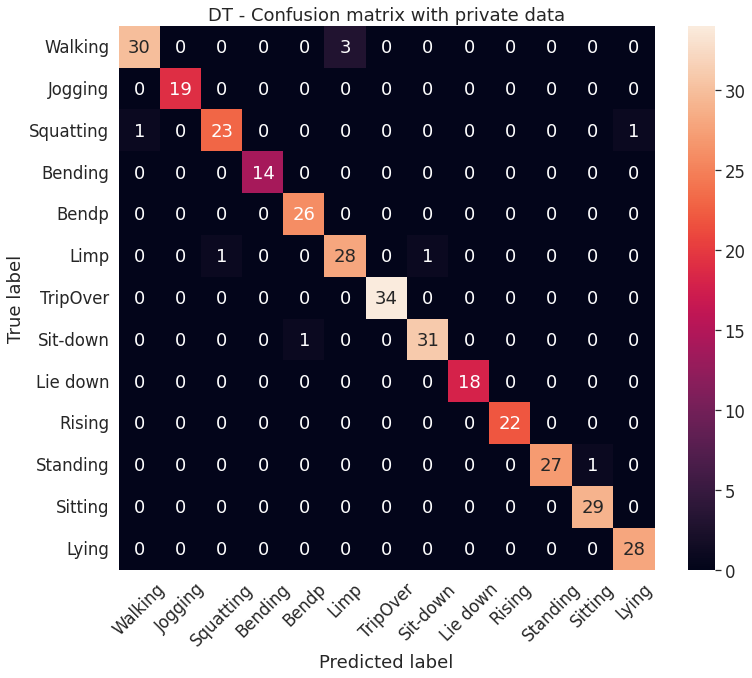

In [ ]:

y_pred = model_DT.predict(test_features)
lables = np.concatenate([target_names, ])

plot_confusion_matrix(label_window_test, y_pred, classes=lables,  
        title='DT - Confusion matrix with private data')


Confusion matrix, without normalization

 [[33  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28]] 



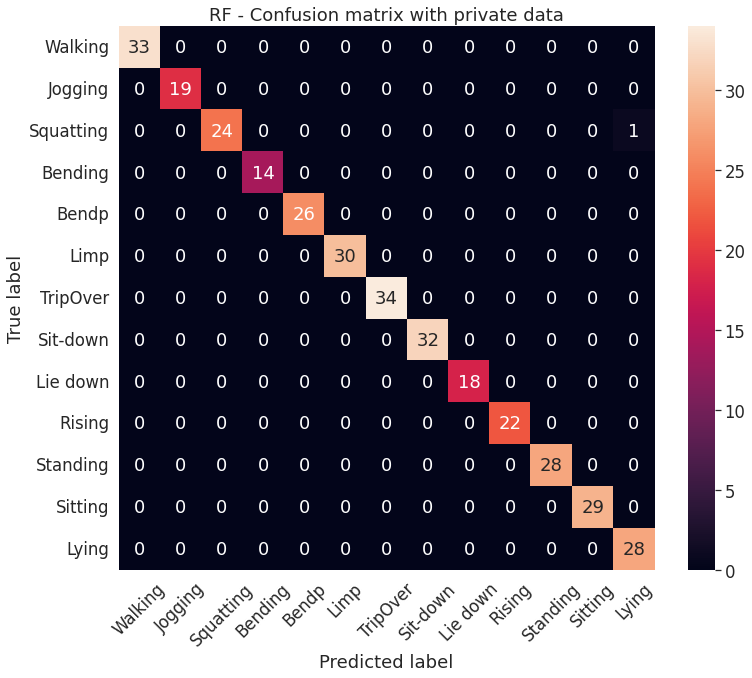

In [ ]:
y_pred = model_RF.predict(test_features)
lables = np.concatenate([target_names, ])

plot_confusion_matrix(label_window_test, y_pred, classes=lables,  
        title='RF - Confusion matrix with private data')


Confusion matrix, without normalization

 [[31  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  1  0  0  0  0  0  0  1]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 29  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0 31  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 17  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28]] 



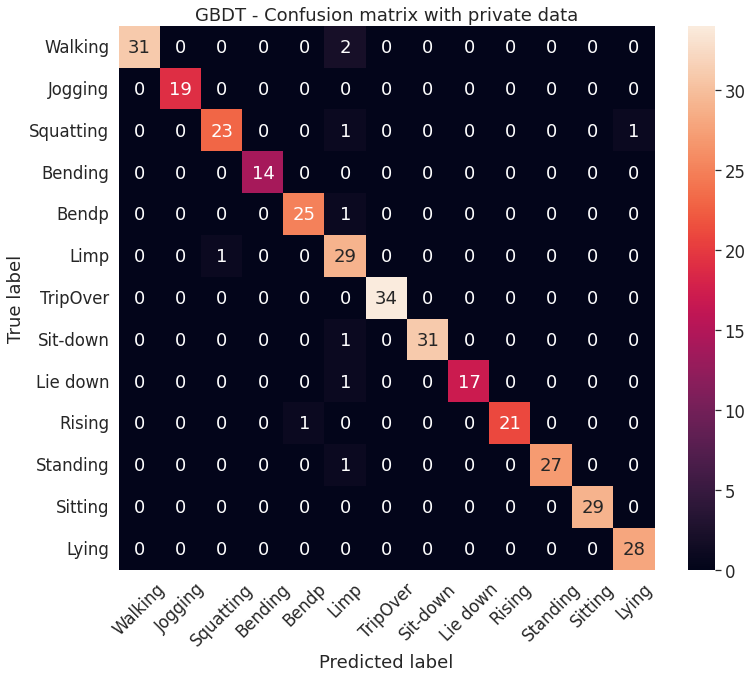

In [ ]:
y_pred = model_GBDT.predict(test_features)
lables = np.concatenate([target_names, ])

plot_confusion_matrix(label_window_test, y_pred, classes=lables,  
        title='GBDT - Confusion matrix with private data')


Confusion matrix, without normalization

 [[33  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  1  0  0  0  0  0  0  1]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 29  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28]] 



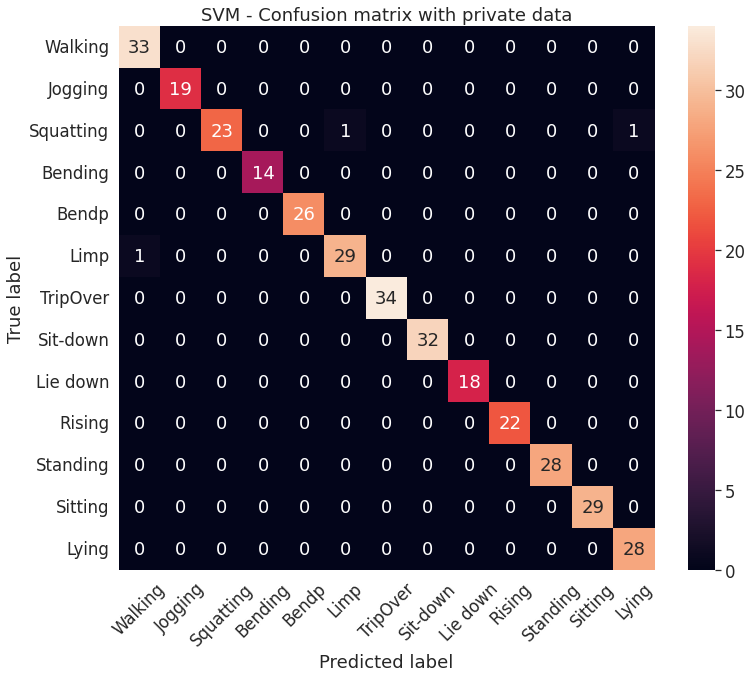

In [ ]:
y_pred = model_SVM.predict(test_features)
lables = np.concatenate([target_names, ])

plot_confusion_matrix(label_window_test, y_pred, classes=lables,  
        title='SVM - Confusion matrix with private data')


Confusion matrix, without normalization

 [[33  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  1  0  0  0  0  0  0  1]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1 28  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28]] 



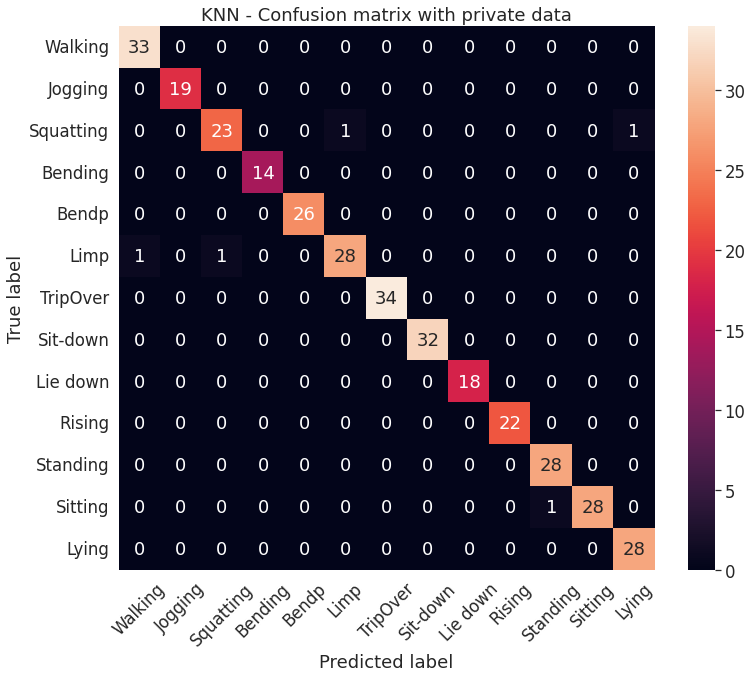

In [ ]:
y_pred = model_KNN.predict(test_features)
lables = np.concatenate([target_names, ])

plot_confusion_matrix(label_window_test, y_pred, classes=lables,  
        title='KNN - Confusion matrix with private data')


Confusion matrix, without normalization

 [[60  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 58  0  0  0  0  2  0  0  0  0  0  0]
 [ 2  0 57  0  0  0  0  1  0  1  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  3 53  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0 56  0  0  0  0  0  0  0]
 [ 1  1  0  0  1  2 48  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 50  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0 47  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0 52  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  2 55  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 51]] 



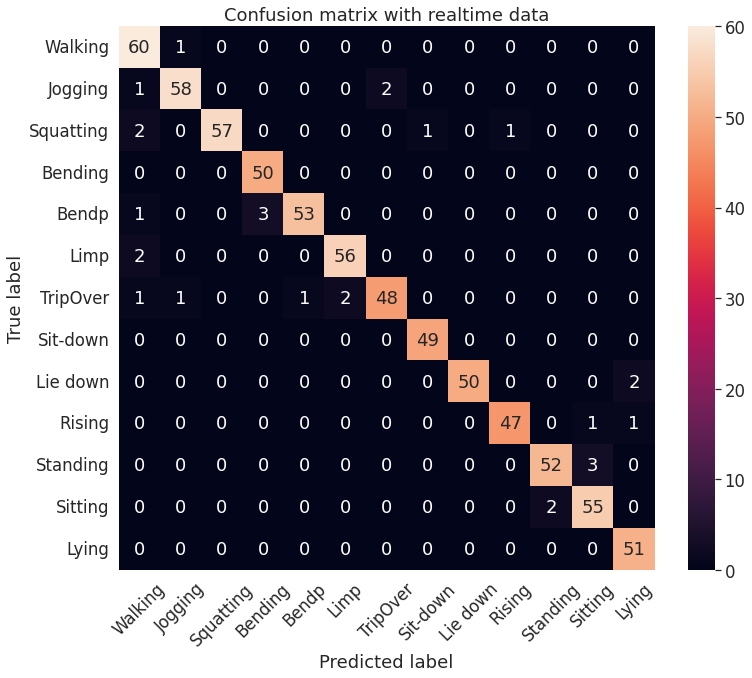

In [11]:
confusion_RL = np.array([[60,1,0,0,0,0,0,0,0,0,0,0,0],
                        [1,58,0,0,0,0,2,0,0,0,0,0,0],
                        [2,0,57,0,0,0,0,1,0,1,0,0,0],
                        [0,0,0,50,0,0,0,0,0,0,0,0,0],
                        [1,0,0,3,53,0,0,0,0,0,0,0,0],
                        [2,0,0,0,0,56,0,0,0,0,0,0,0],
                        [1,1,0,0,1,2,48,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,49,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0,50,0,0,0,2],
                        [0,0,0,0,0,0,0,0,0,47,0,1,1],
                        [0,0,0,0,0,0,0,0,0,0,52,3,0],
                        [0,0,0,0,0,0,0,0,0,0,2,55,0],
                        [0,0,0,0,0,0,0,0,0,0,0,0,51]])


lables = np.concatenate([Activity_list, ])
n_classes = range(len(lables))
lables = lables[n_classes]
print('\nConfusion matrix, without normalization')
print('\n',confusion_RL, '\n')
fig, ax = plt.subplots(figsize = (12,10))
#Create a 2-dim array include: rows, columns, data
dataFrame = pd.DataFrame(confusion_RL)
#create a heatmap, annot = True: add text on each cell over heatmap
sb.heatmap(dataFrame, annot = True, fmt="d")
ax.set(xticklabels=lables, yticklabels=lables,
      title="Confusion matrix with realtime data",
      ylabel='True label',
      xlabel='Predicted label')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sb.set(font_scale = 1.5)
np.set_printoptions(precision=1) #lam tron
plt.show();


In [ ]:
def eva_matrix(actual,predict,list_name):
  arr = confusion_matrix(actual, predict)
  evalution_matrix =  pd.DataFrame(columns =list_name)
  FP = arr.sum(axis=0) - np.diag(arr)  
  FN = arr.sum(axis=1) - np.diag(arr)
  TP = np.diag(arr)
  TN = np.diag(arr).sum() -TP

  # Sensitivity, hit rate, recall, or true positive rate
  SEN = np.round((TP/(TP+FN))*100,decimals = 1).tolist()
  # Precision or positive predictive value
  PPV = np.round((TP/(TP+FP))*100,decimals = 1).tolist()
  # Negative predictive value
  NPV = np.round((TN/(TN+FN))*100,decimals = 1).tolist()
  # Overall accuracy
  ACC = np.round((TP+TN)/(TP+FP+FN+TN)*100,decimals = 1).tolist()
  # ACC = np.array((TP+TN)/(TP+FP+FN+TN)*100,dtype=np.float).tolist()

  # # Specificity or true negative rate
  # SPC = (TN/(TN+FP) ).tolist()
  # # Fall out or false positive rate
  # FPR = (FP/(FP+TN)).tolist()
  # # False negative rate
  # FNR = (FN/(TP+FN)).tolist()
  # # False discovery rate
  # FDR = (FP/(TP+FP)).tolist()
  # for i in range(len(evalution_matrix.columns)):
  #   data_append[evalution_matrix.columns[i]] = ACC[i]
  evalution_matrix = evalution_matrix.append(pd.DataFrame([ACC,SEN,PPV, NPV], columns =list_name))
  # print(evalution_matrix)
  return evalution_matrix
score_RF1 =round(score_RF*100,1)
score_DT1 =round(score_DT*100,1)
score_GBDT1 =round(score_GBDT*100,1)
score_SVM1 =round(score_SVM*100,1)
score_KNN1 =round(score_KNN*100,1)
result_f1_core = pd.DataFrame({'RF':[score_RF1],'DT':[score_DT1], 'DGBDT':[score_GBDT1],'SVM':[score_SVM1],'KNN': [score_KNN1]})
evalRF = eva_matrix(label_window_test, predictedRF,Activity_list)
evalDT = eva_matrix(label_window_test, predictedDT,Activity_list)
evalGBDT = eva_matrix(label_window_test, predictedGBDT,Activity_list)
evalSVM = eva_matrix(label_window_test, predicted_SVM,Activity_list)
evalKNN = eva_matrix(label_window_test, predicted_KNN,Activity_list)

!pip install XlsxWriter

resultRF = pd.DataFrame(evalRF)
resultDT = pd.DataFrame(evalDT)
resultGBDT = pd.DataFrame(evalGBDT)
resultSVM = pd.DataFrame(evalSVM)
resultKNN = pd.DataFrame(evalKNN)
income_sheets = {'F1_core': result_f1_core,'RF': resultRF, 'DT': resultDT,
                 'GBDT': resultGBDT, 'SVM': resultSVM,'KNN':resultKNN }
writer = pd.ExcelWriter(address+'result/result_private_31features.xlsx', engine='xlsxwriter')
for sheet_name in income_sheets.keys():
    income_sheets[sheet_name].to_excel(writer, sheet_name=sheet_name, index=False)
writer.save()